# Práctica 2

In [150]:
import numpy as np
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [151]:
def carga_csv(file_name):
    valores = read_csv(file_name, header=None).to_numpy()
    return valores.astype(float)

In [152]:
def dataProcessing(datos):
    X = datos[:, :-1]
    Y = datos[:, -1]
    m = np.shape(X)[0]
    n = np.shape(X)[1]
    
    return X, Y, m, n

In [153]:
#Debe funcionar con un entero, un vector y una matriz. Para un vector y una matriz debe ser el resultado de aplicarle la
#función sigmoide a cada elemento del vector o la matriz.
def sigmoide(z):
    return (1.0/(1.0+np.exp(-z)))

In [154]:
def coste(X, y, Theta):
    m=np.shape(X)[0]
    item1 = np.matmul(np.transpose(np.log((sigmoide(np.dot(X,Theta))))),y)
    item2 = np.matmul(np.transpose(np.log(1-sigmoide(np.dot(X,Theta)))),(1-y))
    return -(item1 + item2)/m

In [155]:
def gradiente(X, y, Theta):
    return np.matmul(np.transpose(X),(sigmoide(np.matmul(X,Theta))-y))/m

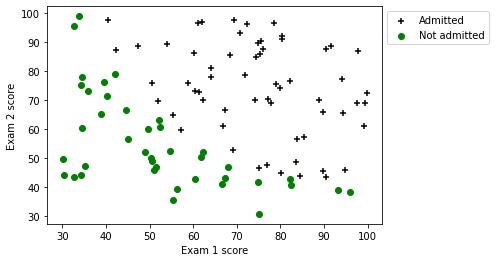

In [156]:
datos = carga_csv('ex2data1.csv')
X, Y, m, n = dataProcessing(datos)

pos_plus = np.where(Y==1)
pos_min = np.where(Y==0)

plt.scatter(X[pos_plus, 0], X[pos_plus, 1], marker ='+', c='k', label ='Admitted')
plt.scatter(X[pos_min, 0], X[pos_min, 1], c='green', label = 'Not admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc = 'best', bbox_to_anchor=(1,1))


In [157]:
X = np.hstack([np.ones([m, 1]), X])

In [158]:
Theta = np.zeros(n+1)

#print(Theta)
#print(X)
#print(Y)
c = coste(X, Y, Theta)
grad = gradiente(X, Y, Theta)
print('Coste = {}'.format(c))
print('Gradiente = {}'.format(grad))

Coste = 0.6931471805599452
Gradiente = [ -0.1        -12.00921659 -11.26284221]


In [161]:
result = opt.fmin_tnc(func=coste, x0=Theta, fprime=gradiente, args=(X,Y))
Theta_opt=result[0]

ValueError: shapes (3,) and (100,) not aligned: 3 (dim 0) != 100 (dim 0)